In [1]:
#! pip install pandas

In [2]:
#! pip install matplotlib

# Table of Contents
1. [Data sources](##data-sources)
2. [Approach](#approach)
3. [Step_1](#step_1)
4. [Step_2](#step_2)
5. [Step_3](#step_3)
6. [Step_4](#step_4)
7. [Step_5](#step_5)
8. [Step_6](#step_6)
9. [Visualization](#Visualization)
10. [Step_7](#step_7)
11. [Step_8](#step_8)
12. [Step_9](#step_9)
13. [Step_10](#step_10)
4. [Final dataframe](#Final-dataframe)

## Data sources

+ **Source_1**: Scrapping data (total CO2 and levels) from https://ig.ft.com/carbon-food-labelling/ (courtsy: Anirban Bhowmick) (filename: 00_data.csv)
<br>

+ **Source_2**: Scrapping data (CO2 contributors) from https://ig.ft.com/carbon-food-labelling/ (courtsy: Sabeeh) (filename: 01_items_carbon-emission.csv)
<br>

+ **Source_3**: Downloaded data (CO2 grocery emissions) from https://ourworldindata.org/grapher/food-emissions-supply-chain?tab=table&country=Beef+%28beef+herd%29~Cheese~Poultry+Meat~Milk~Eggs~Rice~Pig+Meat~Peas~Bananas~Wheat+%26+Rye~Fish+%28farmed%29~Lamb+%26+Mutton~Beef+%28dairy+herd%29~Shrimps+%28farmed%29~Tofu~Maize~Coffee~Other+Pulses~Citrus+Fruit~Other+Fruit~Sunflower+Oil~Apples~Brassicas~Olive+Oil~Potatoes~Palm+Oil~Barley~Soybean+Oil~Wine~Root+Vegetables~Dark+Chocolate~Cane+Sugar~Nuts~Tomatoes~Rapeseed+Oil~Groundnuts (filename: 02_food-emissions-supply-chain.csv)
<br>

+ **Source_4**: Downloaded data (Ref 29: CO2 contributors) from https://www.nature.com/articles/s41597-021-00909-8#Sec15 (filename: 03_Food_database.csv)

## Approach

- Step-1: Import `source_1` in order to get CO2 label ranges [`LOW`, `MEDIUM`, `HIGH`, `VERY HIGH`] as a reference for final dataframe
<br>

- Step-2: Import `source_2` 
<br>

- Step-3: Combine `source_1` and `source_2` and perform data cleaning
<br>

- Step-4: Import `source_3` and perform *feature engineering* to get values for CO2 contributors [`Agriculture`, `Food_processing`, `Transport`, `Packaging`]
<br>

- Step-5: Combine Step-3 and Step-4
<br>

- Step-6: Combine common items using groupby function (aggrigate average/mean)
<br>

- Step-7: Import `source_4` and perform data cleaning
<br>

- Step-8: Combine Step-6 and Step-7
<br>

- Step-9: Combine common items using groupby function (aggrigate max)
<br>

- Step-10: Add column for label ranges from `Step-1`

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


### Step_1

In [2]:
# importing source_1


df0 = pd.read_csv('src/data/00_data.csv')
df0.head()

,Unnamed: 0,item,CO2_per_kg,CO2_level
0,0,Almonds,6.1,MEDIUM
1,1,Apple pie,2.9,MEDIUM
2,2,Apples,0.3,LOW
3,3,"Apricots, dried",2.4,LOW
4,4,Avocado,1.1,LOW


In [5]:
# Creating table for CO2 label ranges

df0.groupby(['CO2_level'], as_index=False)['CO2_per_kg'].agg([min, max])

,min,max
CO2_level,,
HIGH,8.7,16.9
LOW,0.2,2.6
MEDIUM,2.9,7.8
VERY HIGH,19.9,64.8


In [6]:
# Feature engineering: Dropping not required features/columns 

df0.drop(['Unnamed: 0', 'CO2_level'], axis=1, inplace=True)

In [7]:
# first 5 rows 

df0.head()

,item,CO2_per_kg
0,Almonds,6.1
1,Apple pie,2.9
2,Apples,0.3
3,"Apricots, dried",2.4
4,Avocado,1.1


### Step_2

In [3]:
# importing source_2

df = pd.read_csv('src/data/01_items_carbon-emission.csv')
df

,item,Agriculture,Food_processing,Transport,Packaging
0,Almonds,5.2 kg,0.1 kg,0.4 kg,0.4 kg
1,Apple pie,1.9 kg,0.6 kg,0.1 kg,0.3 kg
2,Apples,0.1 kg,<0.1 kg,0.2 kg,<0.1 kg
3,"Apricots, dried",1.8 kg,<0.1 kg,0.3 kg,0.3 kg
4,Avocado,0.7 kg,-,0.3 kg,0.1 kg
...,...,...,...,...,...
74,"Sweetcorn, canned",0.7 kg,<0.1 kg,0.2 kg,0.5 kg
75,Tofu,0.4 kg,0.5 kg,0.2 kg,0.3 kg
76,Tomatoes,1.7 kg,<0.1 kg,0.1 kg,<0.1 kg
77,"Tuna, canned",0.6 kg,7.3 kg,0.5 kg,0.9 kg


### Step_3

In [9]:
# combining source_1 and source_2

df1 = df.merge(df0, on='item')
df1

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Almonds,5.2 kg,0.1 kg,0.4 kg,0.4 kg,6.1
1,Apple pie,1.9 kg,0.6 kg,0.1 kg,0.3 kg,2.9
2,Apples,0.1 kg,<0.1 kg,0.2 kg,<0.1 kg,0.3
3,"Apricots, dried",1.8 kg,<0.1 kg,0.3 kg,0.3 kg,2.4
4,Avocado,0.7 kg,-,0.3 kg,0.1 kg,1.1
...,...,...,...,...,...,...
74,"Sweetcorn, canned",0.7 kg,<0.1 kg,0.2 kg,0.5 kg,1.4
75,Tofu,0.4 kg,0.5 kg,0.2 kg,0.3 kg,1.3
76,Tomatoes,1.7 kg,<0.1 kg,0.1 kg,<0.1 kg,1.8
77,"Tuna, canned",0.6 kg,7.3 kg,0.5 kg,0.9 kg,9.3


In [10]:
# cleaning dataframe

df1['Agriculture'] = df1.Agriculture.str.extract(r"(\d+\.\d+)")
df1['Food_processing'] = df1.Food_processing.str.extract(r"(\d+\.\d+)")
df1['Transport'] = df1.Transport.str.extract(r"(\d+\.\d+)")
df1['Packaging'] = df1.Packaging.str.extract(r"(\d+\.\d+)")

In [11]:
# cleaning dataframe

df1.Food_processing.unique()

array(['0.1', '0.6', nan, '0.2', '0.7', '0.3', '0.9', '1.1', '0.8', '2.5',
       '6.1', '0.4', '1.4', '0.5', '16.5', '7.3'], dtype=object)

In [12]:
# cleaning dataframe
# replacing nan with 0

df1 = df1.fillna(0)

In [13]:
# datatype for a dataframe

df1.dtypes

item                object
Agriculture         object
Food_processing     object
Transport           object
Packaging           object
CO2_per_kg         float64
dtype: object

In [14]:
# converting objects to float

df1['Agriculture'] = df1.Agriculture.astype(float)
df1['Food_processing'] = df1.Food_processing.astype(float)
df1['Transport'] = df1.Transport.astype(float)
df1['Packaging'] = df1.Packaging.astype(float)

In [15]:
# first 10 values

df1.head(10)

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Almonds,5.2,0.1,0.4,0.4,6.1
1,Apple pie,1.9,0.6,0.1,0.3,2.9
2,Apples,0.1,0.1,0.2,0.1,0.3
3,"Apricots, dried",1.8,0.1,0.3,0.3,2.4
4,Avocado,0.7,0.0,0.3,0.1,1.1
5,Bananas,0.2,0.1,0.3,0.1,0.5
6,Beef fillet steak,64.7,0.1,0.1,0.1,64.8
7,Beef mince,20.1,0.1,0.1,0.3,21.0
8,Beef ribeye steak,45.4,0.1,0.1,0.1,45.5
9,Beef sirloin steak,31.7,0.1,0.1,0.1,31.8


In [16]:
# last 10 values

df1.tail(10)

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
69,Seitan,0.3,0.1,0.1,0.1,0.5
70,Soft drink,0.1,0.8,0.1,0.1,1.1
71,Soya milk,0.1,0.1,0.1,0.2,0.4
72,"Spinach, frozen",0.2,0.1,0.1,0.1,0.3
73,Strawberries,0.1,0.0,0.1,0.1,0.2
74,"Sweetcorn, canned",0.7,0.1,0.2,0.5,1.4
75,Tofu,0.4,0.5,0.2,0.3,1.3
76,Tomatoes,1.7,0.1,0.1,0.1,1.8
77,"Tuna, canned",0.6,7.3,0.5,0.9,9.3
78,Yoghurt,2.7,0.2,0.1,0.1,3.1


### Step_4

In [4]:
# importing source_3

df2 = pd.read_csv('src/data/02_food-emissions-supply-chain.csv')
df2 = df2.round(2)
df2.head()

,Entity,Code,Year,food_emissions_land_use,food_emissions_farm,food_emissions_animal_feed,food_emissions_processing,food_emissions_transport,food_emissions_retail,food_emissions_packaging,food_emissions_losses
0,Apples,NaN,2018,-0.03,0.23,0.00,0.00,0.10,0.02,0.04,0.07
1,Bananas,NaN,2018,-0.03,0.27,0.00,0.06,0.30,0.02,0.07,0.18
2,Barley,NaN,2018,0.01,0.18,0.00,0.13,0.04,0.26,0.50,0.07
3,Beef (beef herd),NaN,2018,23.24,56.23,2.68,1.81,0.49,0.23,0.35,14.44
4,Beef (dairy herd),NaN,2018,1.27,21.92,3.50,1.55,0.59,0.25,0.37,3.85


In [18]:
# Feature engineering: combining features/columns to get the values for 'Agriculture', 'Food_processing', 'Transport', 'Packaging'

df2['Agriculture'] = df2['food_emissions_land_use'] + df2['food_emissions_farm'] + df2['food_emissions_animal_feed']
df2['Food_processing'] = df2['food_emissions_processing']
df2['Transport'] = df2['food_emissions_transport']
df2['Packaging'] = df2['food_emissions_retail'] + df2['food_emissions_packaging']

In [19]:
# Feature engineering: creating dataframe form required features

df2_clean = df2[['Entity' , 'Agriculture', 'Food_processing', 'Transport', 'Packaging']]
df2_clean.head()

,Entity,Agriculture,Food_processing,Transport,Packaging
0,Apples,0.20,0.00,0.10,0.06
1,Bananas,0.24,0.06,0.30,0.09
2,Barley,0.19,0.13,0.04,0.76
3,Beef (beef herd),82.15,1.81,0.49,0.58
4,Beef (dairy herd),26.69,1.55,0.59,0.62


In [20]:
# renaming column

df2_clean.rename(columns={'Entity': 'item'}, inplace=True)

/var/folders/1w/0plrj97d329bxjcyycwzdjvr0000gn/T/ipykernel_98237/1964520607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean.rename(columns={'Entity': 'item'}, inplace=True)


In [21]:
# summing CO2 contributors

df2_clean['CO2_per_kg'] = df2['Agriculture'] + df2['Agriculture'] + df2['Transport'] + df2['Packaging']

/var/folders/1w/0plrj97d329bxjcyycwzdjvr0000gn/T/ipykernel_98237/2015773823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_clean['CO2_per_kg'] = df2['Agriculture'] + df2['Agriculture'] + df2['Transport'] + df2['Packaging']


In [22]:
# first 5 rows

df2_clean.head()

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Apples,0.20,0.00,0.10,0.06,0.56
1,Bananas,0.24,0.06,0.30,0.09,0.87
2,Barley,0.19,0.13,0.04,0.76,1.18
3,Beef (beef herd),82.15,1.81,0.49,0.58,165.37
4,Beef (dairy herd),26.69,1.55,0.59,0.62,54.59


### Step_5

In [23]:
# combining step_3 and step_4 dataframes

df3 = pd.concat([df1, df2_clean]).reset_index(drop=True)
df3

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Almonds,5.20,0.10,0.40,0.40,6.10
1,Apple pie,1.90,0.60,0.10,0.30,2.90
2,Apples,0.10,0.10,0.20,0.10,0.30
3,"Apricots, dried",1.80,0.10,0.30,0.30,2.40
4,Avocado,0.70,0.00,0.30,0.10,1.10
...,...,...,...,...,...,...
117,Sunflower Oil,2.10,0.21,0.18,0.82,5.20
118,Tofu,1.45,0.79,0.18,0.45,3.53
119,Tomatoes,1.08,0.01,0.18,0.17,2.51
120,Wheat & Rye,0.92,0.21,0.13,0.15,2.12


In [24]:
# sorting values w.r.t items

df3 = df3.sort_values('item').reset_index(drop=True)
df3.head(20)

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Almonds,5.20,0.10,0.40,0.40,6.10
1,Apple pie,1.90,0.60,0.10,0.30,2.90
2,Apples,0.20,0.00,0.10,0.06,0.56
3,Apples,0.10,0.10,0.20,0.10,0.30
4,"Apricots, dried",1.80,0.10,0.30,0.30,2.40
5,Avocado,0.70,0.00,0.30,0.10,1.10
6,Bananas,0.20,0.10,0.30,0.10,0.50
7,Bananas,0.24,0.06,0.30,0.09,0.87
8,Barley,0.19,0.13,0.04,0.76,1.18
9,Beef (beef herd),82.15,1.81,0.49,0.58,165.37


In [25]:
# in order to see how many items are more then 1 time, we will use values count function

df3.item.value_counts().head(10)

Potatoes              2
Bananas               2
Tomatoes              2
Tofu                  2
Apples                2
Pork bacon            1
Pork chops            1
Plant-based cheese    1
Other Pulses          1
Plant-based burger    1
Name: item, dtype: int64

### Step_6

In [26]:
# use groupby function to combine items which are more then 1 time using average aggrigate

df3 = df3.groupby('item').mean().reset_index()
df3.head()

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,Almonds,5.20,0.10,0.40,0.40,6.10
1,Apple pie,1.90,0.60,0.10,0.30,2.90
2,Apples,0.15,0.05,0.15,0.08,0.43
3,"Apricots, dried",1.80,0.10,0.30,0.30,2.40
4,Avocado,0.70,0.00,0.30,0.10,1.10


In [27]:
# converting items to lower case

def lowercase(item):
    return item.lower()

df3['item'] = df3['item'].apply(lowercase)

In [28]:
df3.replace(',','', regex=True, inplace=True)

In [29]:
df3.head()

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,almonds,5.20,0.10,0.40,0.40,6.10
1,apple pie,1.90,0.60,0.10,0.30,2.90
2,apples,0.15,0.05,0.15,0.08,0.43
3,apricots dried,1.80,0.10,0.30,0.30,2.40
4,avocado,0.70,0.00,0.30,0.10,1.10


## Visualization

<AxesSubplot: ylabel='item'>

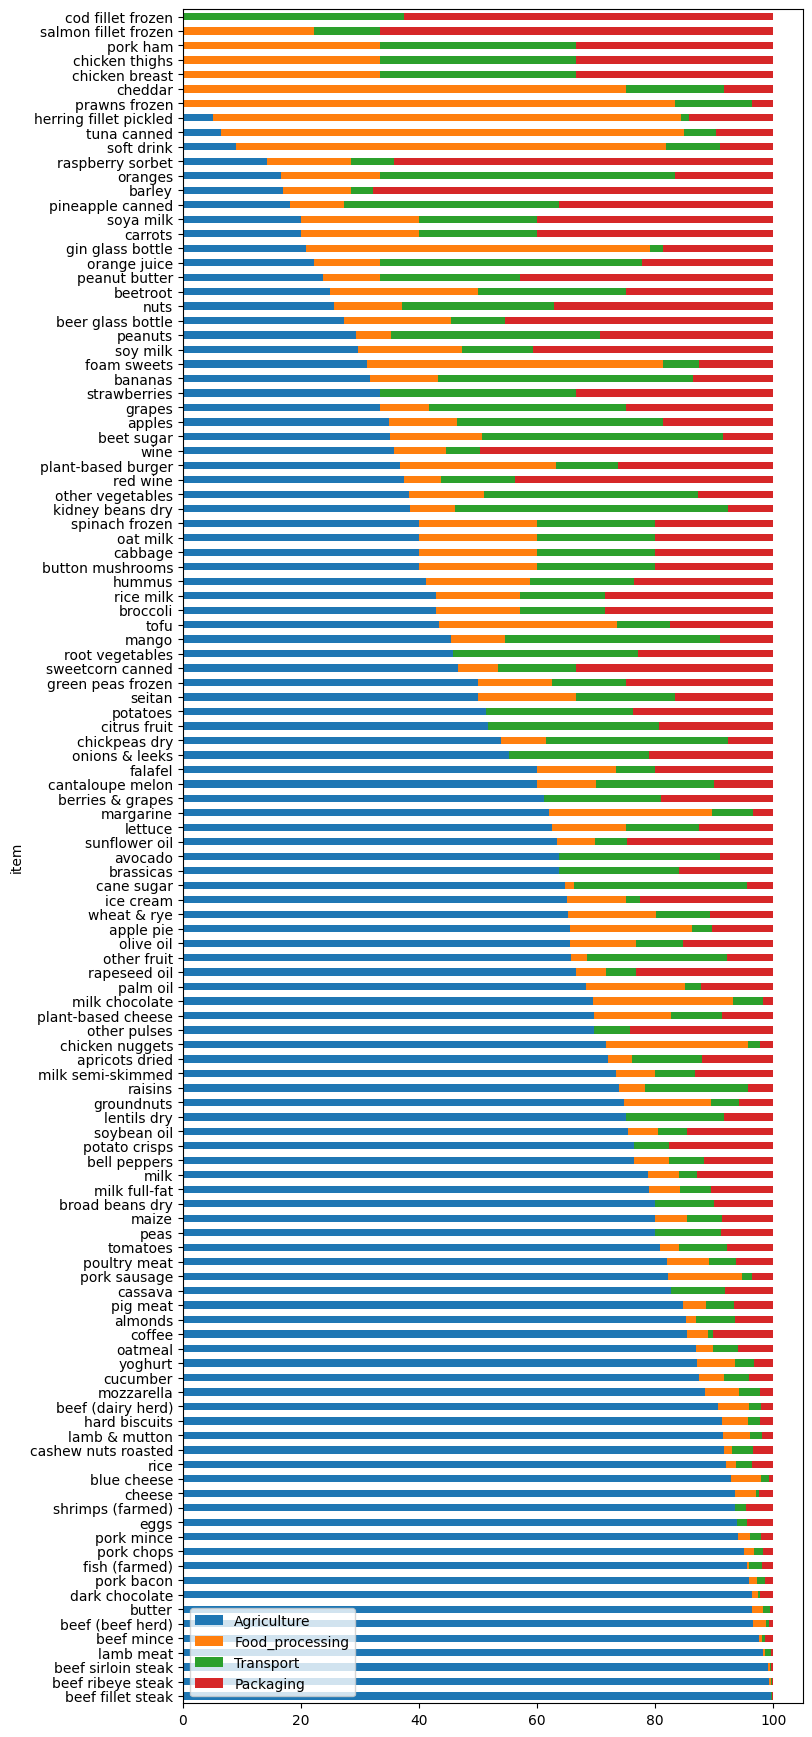

In [30]:
# converting CO2 contributors (Agriculture, Food_processing, Transport, Packaging) to %age and make the plot

df_plot = df3[['item', 'Agriculture', 'Food_processing', 'Transport', 'Packaging']]
df_item_index = df_plot.set_index('item')

# Convert numeric values to percentage of whole
df_percentage = df_item_index.apply(lambda x: (x * 100) / sum(x), axis=1).sort_values(by=['Agriculture', 'Food_processing', 'Transport', 'Packaging'], ascending=False)

df_percentage.plot.barh(stacked=True, figsize=(8, 22))

Text(0, 0.5, 'Grocery Items')

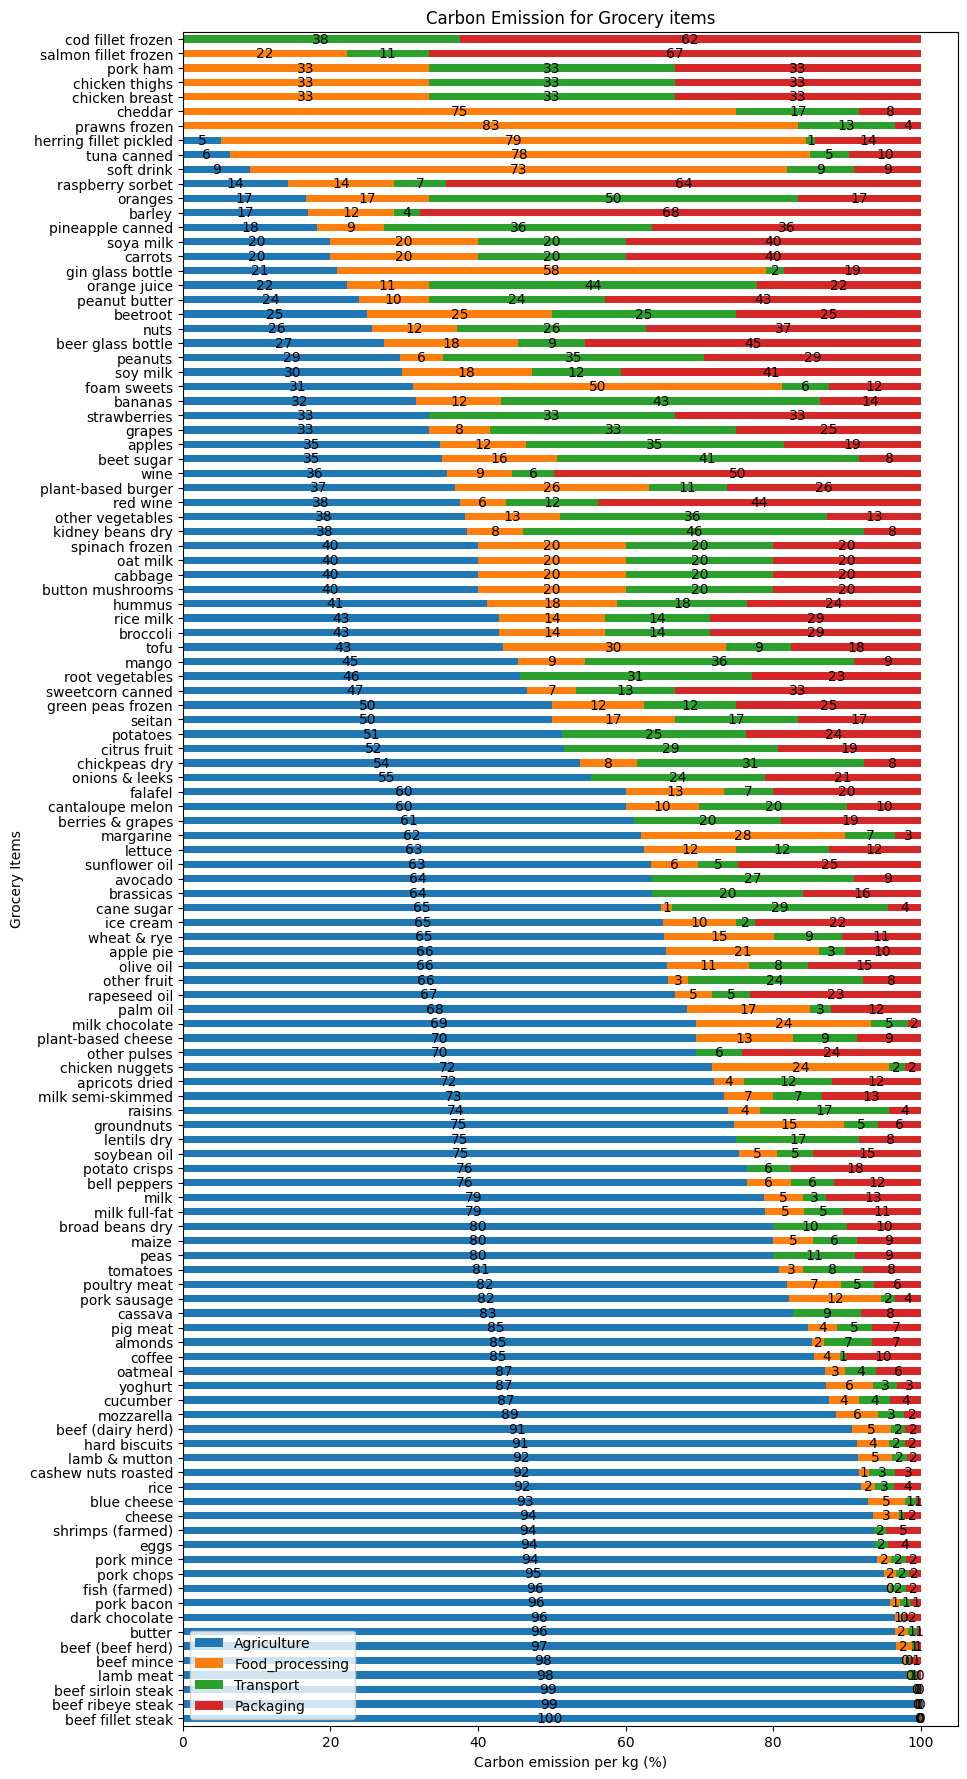

In [31]:
# plot with values

ax = df_percentage.plot.barh(stacked=True, figsize=(10, 22))

for c in ax.containers:

    # format the number of decimal places and replace 0 with an empty string
    labels = [f'{w:.0f}' if (w := v.get_width()) > 0 else '' for v in c ]
    
    ax.bar_label(c, labels=labels, label_type='center')

plt.title("Carbon Emission for Grocery items", )
plt.xlabel("Carbon emission per kg (%)")
plt.ylabel("Grocery Items")

### Step_7

In [32]:
# importing source_4

df4 = pd.read_csv('03_Food_database.csv')
df4

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,ALFONSINO,0,0,0,0,3.49
1,ALMONDS,0,0,0,0,1.88
2,ALMOND COVERED WITH CHOCOLATE,0,0,0,0,4.80
3,ALMOND MILK,0,0,0,0,0.42
4,ALMOND PASTE,0,0,0,0,2.98
...,...,...,...,...,...,...
302,YOGURT FLAVOURED**,0,0,0,0,2.85
303,YOGURT LACTOSE FREE,0,0,0,0,3.47
304,YOGURT WHITE,0,0,0,0,1.69
305,ZUCCHINI,0,0,0,0,1.24


In [33]:
# cleaning item column

df4['item'] = df4['item'].str.replace(r"\s*\([^()]*\)", "", regex=True).str.strip()

df4.tail(20)

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
287,VANILLA ICE CREAM,0,0,0,0,4.30
288,VEGETABLES,0,0,0,0,0.54
289,WALNUT,0,0,0,0,2.06
290,WATERMELON,0,0,0,0,0.52
291,WHEAT GRAINS,0,0,0,0,0.57
292,WHEAT PLAIN FLOUR,0,0,0,0,0.52
293,WHITING,0,0,0,0,2.66
294,WHOLE WHEAT FLOUR,0,0,0,0,0.36
295,WHOLEGRAIN CRACKERS**,0,0,0,0,0.97
296,WINE,0,0,0,0,0.66


In [34]:
# cleaning item column

df4['item'] = df4['item'].map(lambda x: x.rstrip('*'))

df4.tail(20)

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
287,VANILLA ICE CREAM,0,0,0,0,4.30
288,VEGETABLES,0,0,0,0,0.54
289,WALNUT,0,0,0,0,2.06
290,WATERMELON,0,0,0,0,0.52
291,WHEAT GRAINS,0,0,0,0,0.57
292,WHEAT PLAIN FLOUR,0,0,0,0,0.52
293,WHITING,0,0,0,0,2.66
294,WHOLE WHEAT FLOUR,0,0,0,0,0.36
295,WHOLEGRAIN CRACKERS,0,0,0,0,0.97
296,WINE,0,0,0,0,0.66


In [35]:
# converting items to lower case

df4['item'] = df4['item'].apply(lowercase)

In [36]:
# first 5 rows

df4.head()

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,alfonsino,0,0,0,0,3.49
1,almonds,0,0,0,0,1.88
2,almond covered with chocolate,0,0,0,0,4.80
3,almond milk,0,0,0,0,0.42
4,almond paste,0,0,0,0,2.98


### Step_8

In [37]:
# combining step_6 and step_7 dataframes

df5 = pd.concat([df3, df4]).reset_index(drop=True)
df5

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,almonds,5.20,0.10,0.40,0.40,6.10
1,apple pie,1.90,0.60,0.10,0.30,2.90
2,apples,0.15,0.05,0.15,0.08,0.43
3,apricots dried,1.80,0.10,0.30,0.30,2.40
4,avocado,0.70,0.00,0.30,0.10,1.10
...,...,...,...,...,...,...
419,yogurt flavoured,0.00,0.00,0.00,0.00,2.85
420,yogurt lactose free,0.00,0.00,0.00,0.00,3.47
421,yogurt white,0.00,0.00,0.00,0.00,1.69
422,zucchini,0.00,0.00,0.00,0.00,1.24


In [38]:
# in order to see how many items are more then 1 time, we will use values count function

df5.item.value_counts().head(40)

almonds                 2
grapes                  2
strawberries            2
cheese                  2
soybean oil             2
soy milk                2
palm oil                2
cucumber                2
dark chocolate          2
eggs                    2
salmon fillet frozen    2
rice milk               2
rice                    2
red wine                2
carrots                 2
rapeseed oil            2
ice cream               2
lettuce                 2
mango                   2
margarine               2
pork ham                2
milk chocolate          2
mozzarella              2
olive oil               2
orange juice            2
peanuts                 2
sunflower oil           2
cod fillet frozen       2
peanut butter           2
broccoli                2
cane sugar              2
beer glass bottle       2
beet sugar              2
beetroot                2
bananas                 2
tuna canned             2
avocado                 2
wine                    2
cabbage     

In [39]:
# sorting values w.r.t items

df6 = df5.sort_values('item').reset_index(drop=True)
df6

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,alfonsino,0.0,0.0,0.0,0.0,3.49
1,almond covered with chocolate,0.0,0.0,0.0,0.0,4.80
2,almond milk,0.0,0.0,0.0,0.0,0.42
3,almond paste,0.0,0.0,0.0,0.0,2.98
4,almonds,5.2,0.1,0.4,0.4,6.10
...,...,...,...,...,...,...
419,yogurt flavoured,0.0,0.0,0.0,0.0,2.85
420,yogurt lactose free,0.0,0.0,0.0,0.0,3.47
421,yogurt white,0.0,0.0,0.0,0.0,1.69
422,zucchini,0.0,0.0,0.0,0.0,1.24


In [40]:
# showing duplicate items

df6[df6['item'].duplicated(keep=False)]

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
4,almonds,5.200,0.100,0.40,0.400,6.100
5,almonds,0.000,0.000,0.00,0.000,1.880
10,apples,0.150,0.050,0.15,0.080,0.430
11,apples,0.000,0.000,0.00,0.000,0.250
17,avocado,0.000,0.000,0.00,0.000,0.820
...,...,...,...,...,...,...
383,tofu,0.925,0.645,0.19,0.375,2.415
395,tuna canned,0.600,7.300,0.50,0.900,9.300
396,tuna canned,0.000,0.000,0.00,0.000,2.100
412,wine,0.000,0.000,0.00,0.000,0.660


### Step_9

In [41]:
# use groupby function to combine items which are more then 1 time using max aggrigate

df6 = df6.groupby('item').max().reset_index()
df6

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg
0,alfonsino,0.0,0.0,0.0,0.0,3.49
1,almond covered with chocolate,0.0,0.0,0.0,0.0,4.80
2,almond milk,0.0,0.0,0.0,0.0,0.42
3,almond paste,0.0,0.0,0.0,0.0,2.98
4,almonds,5.2,0.1,0.4,0.4,6.10
...,...,...,...,...,...,...
377,yogurt flavoured,0.0,0.0,0.0,0.0,2.85
378,yogurt lactose free,0.0,0.0,0.0,0.0,3.47
379,yogurt white,0.0,0.0,0.0,0.0,1.69
380,zucchini,0.0,0.0,0.0,0.0,1.24


In [42]:
df6 = df6.round(2)

In [43]:
# min/max values for total CO2

df6.CO2_per_kg.agg([min, max])

min      0.11
max    165.37
Name: CO2_per_kg, dtype: float64

### Step_10

In [44]:
# adding 'label ranges' column using Step-1 reference values 

conditions = [(df6['CO2_per_kg'] >= 0.1) & (df6['CO2_per_kg'] <= 2.9),
                    (df6['CO2_per_kg'] > 2.9) & (df6['CO2_per_kg'] <= 8.7),
                    (df6['CO2_per_kg'] > 8.7) & (df6['CO2_per_kg'] <= 19.9),
                    (df6['CO2_per_kg'] > 19.9) & (df6['CO2_per_kg'] <= 200)]
                    
values = ['LOW', 'MEDIUM', 'HIGH', 'VERY HIGH']

df6['CO2_level'] = np.select(conditions, values)

In [45]:
# final dataframe

df6

,item,Agriculture,Food_processing,Transport,Packaging,CO2_per_kg,CO2_level
0,alfonsino,0.0,0.0,0.0,0.0,3.49,MEDIUM
1,almond covered with chocolate,0.0,0.0,0.0,0.0,4.80,MEDIUM
2,almond milk,0.0,0.0,0.0,0.0,0.42,LOW
3,almond paste,0.0,0.0,0.0,0.0,2.98,MEDIUM
4,almonds,5.2,0.1,0.4,0.4,6.10,MEDIUM
...,...,...,...,...,...,...,...
377,yogurt flavoured,0.0,0.0,0.0,0.0,2.85,LOW
378,yogurt lactose free,0.0,0.0,0.0,0.0,3.47,MEDIUM
379,yogurt white,0.0,0.0,0.0,0.0,1.69,LOW
380,zucchini,0.0,0.0,0.0,0.0,1.24,LOW


In [46]:
# counting items w.r.t CO2 level labels

df6.CO2_level.value_counts()

LOW          252
MEDIUM        84
HIGH          29
VERY HIGH     17
Name: CO2_level, dtype: int64

## Final dataframe

In [47]:
df6.to_csv('final_df.csv', index=False)